In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [57]:
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"])
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [58]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False


In [59]:
x = df.drop(columns=["Exited"])
y = df["Exited"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()

model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [65]:
history = model.fit(x_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7806 - loss: 0.5272 - val_accuracy: 0.8050 - val_loss: 0.4573
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4690 - val_accuracy: 0.8144 - val_loss: 0.4293
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4395 - val_accuracy: 0.8163 - val_loss: 0.4148
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4252 - val_accuracy: 0.8300 - val_loss: 0.4032
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8205 - loss: 0.4145 - val_accuracy: 0.8313 - val_loss: 0.3906
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8283 - loss: 0.3992 - val_accuracy: 0.8400 - val_loss: 0.3774
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.3723 - val_accuracy: 0.8394 - val_loss: 0.3690
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8442 - loss: 0.3765 - val_accuracy: 0.

In [66]:
model.layers[0].get_weights()

[array([[-1.72897846e-01,  4.80104461e-02,  3.98961343e-02,
         -1.62289694e-01, -3.43403295e-02,  2.83259779e-01,
         -1.24809392e-01, -1.86862469e-01,  1.85168564e-01,
          1.40330255e-01, -2.45734379e-02],
        [ 5.19992232e-01, -8.56953681e-01, -1.79857805e-01,
          2.35992476e-01, -1.55742150e-02, -1.12563185e-01,
         -1.81966722e-01,  1.33138919e+00,  4.76430446e-01,
         -3.83073092e-01,  2.34595254e-01],
        [-1.29901871e-01,  2.67930999e-02, -1.79904729e-01,
         -1.50675595e-01,  4.59211916e-02,  6.32665977e-02,
         -2.74280936e-01, -1.55947641e-01,  7.64294295e-03,
         -2.04802588e-01,  3.75537306e-01],
        [ 2.64624804e-01, -4.79342997e-01,  1.14067696e-01,
         -1.23988707e-02, -6.96908712e-01,  7.49077022e-01,
          1.13968164e-01,  9.44103822e-02, -7.47467160e-01,
         -6.03450686e-02, -6.30539715e-01],
        [-2.05601007e-01, -3.70284207e-02, -1.08895957e+00,
          1.09649384e+00, -1.22887158e+00,  

In [67]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [68]:
y_pred = np.where(y_log>0.5,1,0)

In [69]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

0.8635


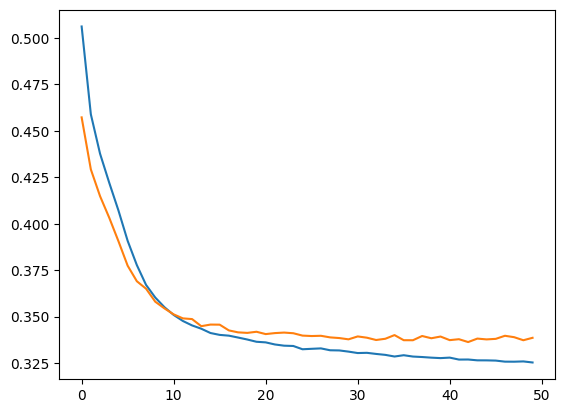

In [71]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

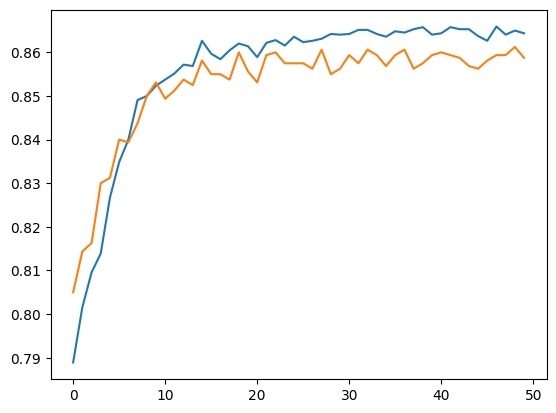

In [72]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])